In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [74]:
import pandas as pd
import math
import numpy as np
import statistics
from statsmodels.multivariate.manova import MANOVA
from scipy import stats
import researchpy as rp
import matplotlib.pyplot as plt


# Import the data from the spreadsheet
df = pd.read_excel('./CommunicationStudySurvey.xlsx')

In [ ]:


#============================
# Survey Questions
#============================

# What is your study ID number?
# What is your gender?
# When is your birthday?
# What year of school are you in?
# How social would you say you are?
# How open are you with strangers in person?
# How open are you with strangers online?
# How trustful are you of technology?
# How many hours a week do you spend on social media?
# How many hours a week do you spend playing multiplayer video games?
# How many hours a week do you spend playing single player video games?

Descriptive Statistics

In [3]:
# Cornelius

socialness = df['How social would you say you are?']
# Socialness
print("Socialness")
print("Mean", statistics.mean(socialness))
print("SD", statistics.stdev(socialness))
print("Median", statistics.median(socialness))
print("Variance", statistics.variance(socialness))

# Inperson Open

inperson_open = df['How open are you with strangers in person?']


Socialness
Mean 6.6
SD 1.6465452046971292
Median 6.5
Variance 2.7111111111111112


**SIMPLE LINEAR REGRESSION TESTS**

Is there a correlation between time spent on social media and openness with strangers in person?

In [4]:
# Nolan


Is there a correlation between time spent on social media and openness with strangers online?

In [5]:
# Nolan

What is the effect of socialness on in-person openness and online openness.

In [98]:
# Nolan
data = pd.read_excel('./CommunicationStudySurvey.xlsx')\
.filter(items = ["How social would you say you are?", "How open are you with strangers in person?", "How open are you with strangers online?"])\
.rename(columns={"How social would you say you are?": "socialness", "How open are you with strangers in person?": "open_inperson", "How open are you with strangers online?": "open_online"})

# Can use MANOVA here
maov = MANOVA.from_formula('open_online + open_inperson  ~ socialness', data = data)
print(maov.mv_test())

                 Multivariate linear model
                                                           
-----------------------------------------------------------
       Intercept        Value  Num DF Den DF F Value Pr > F
-----------------------------------------------------------
          Wilks' lambda 0.4954 2.0000 7.0000  3.5657 0.0855
         Pillai's trace 0.5046 2.0000 7.0000  3.5657 0.0855
 Hotelling-Lawley trace 1.0188 2.0000 7.0000  3.5657 0.0855
    Roy's greatest root 1.0188 2.0000 7.0000  3.5657 0.0855
-----------------------------------------------------------
                                                           
-----------------------------------------------------------
       socialness       Value  Num DF Den DF F Value Pr > F
-----------------------------------------------------------
          Wilks' lambda 0.9608 2.0000 7.0000  0.1429 0.8693
         Pillai's trace 0.0392 2.0000 7.0000  0.1429 0.8693
 Hotelling-Lawley trace 0.0408 2.0000 7.0000  0.1429 0.86

Does trust in technology impact openness to strangers in person

/Users/nolanbrady/opt/anaconda3/lib/python3.9/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
/Users/nolanbrady/opt/anaconda3/lib/python3.9/site-packages/researchpy/ttest.py:140: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


Text(5, 7, 'y = 1.50 + 0.71x')

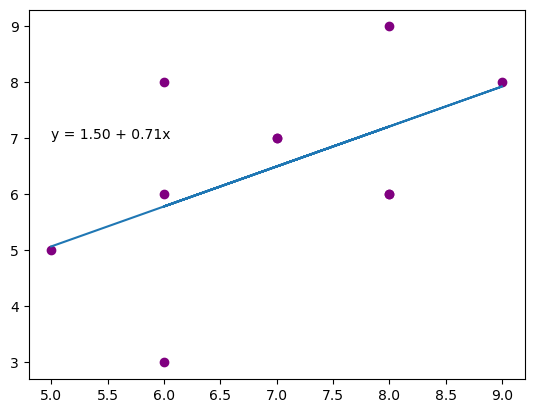

In [49]:
# Used Paired Samples T test since the two values are from the same person.

tech_trust = df['How trustful are you of technology?']
open_inperson = df['How open are you with strangers in person?']

# group1.append(df['How trustful are you of technology?'])

rp.ttest(group1 = tech_trust, group2 = open_inperson, equal_variances = True, paired = True)

#rp.correlation.corr_case(df[['How trustful are you of technology?', 'How open are you with strangers in person?']])


# DATA Viz (line of best fit)
# a, b = np.polyfit(tech_trust, open_inperson, 1)
# plt.scatter(tech_trust, open_inperson, color='purple')
# plt.plot(tech_trust, a*tech_trust+b)
# plt.text(5, 7, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

Does trust in technology impact openness to strangers online

In [72]:
# Used Paired Samples T test since the two values are from the same person.

tech_trust = df['How trustful are you of technology?']
open_online = df['How open are you with strangers online?']

# Paired Samples T-test
rp.ttest(group1 = tech_trust, group2 = open_online, equal_variances = True, paired = True)

# Pearsons R
#rp.correlation.corr_case(df[['How trustful are you of technology?', 'How open are you with strangers online?']])

# DATA Viz (line of best fit)
# a, b = np.polyfit(tech_trust, open_online, 1)
# plt.scatter(tech_trust, open_online, color='purple')
# plt.plot(tech_trust, a*tech_trust+b)
# plt.text(5, 7, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)

/Users/nolanbrady/opt/anaconda3/lib/python3.9/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
/Users/nolanbrady/opt/anaconda3/lib/python3.9/site-packages/researchpy/ttest.py:140: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(                                  Variable     N  Mean        SD        SE  \
 0      How trustful are you of technology?  10.0   7.0  1.247219  0.394405   
 1  How open are you with strangers online?  10.0   5.0  2.211083  0.699206   
 2                                     diff  10.0   2.0  1.247219  0.394405   
 
    95% Conf.  Interval  
 0   6.107793  7.892207  
 1   3.418286  6.581714  
 2   1.107793  2.892207  ,
                                Paired samples t-test  results
 0  Difference (How trustful are you of technology...   2.0000
 1                              Degrees of freedom =    9.0000
 2                                               t =    5.0709
 3                           Two side test p value =    0.0007
 4                          Difference < 0 p value =    0.0003
 5                          Difference > 0 p value =    0.9997
 6                                       Cohen's d =    1.1566
 7                                       Hedge's g =    1.1078
 8        

Is there a correlation between multiplayer gaming and openness with strangers on the internet.

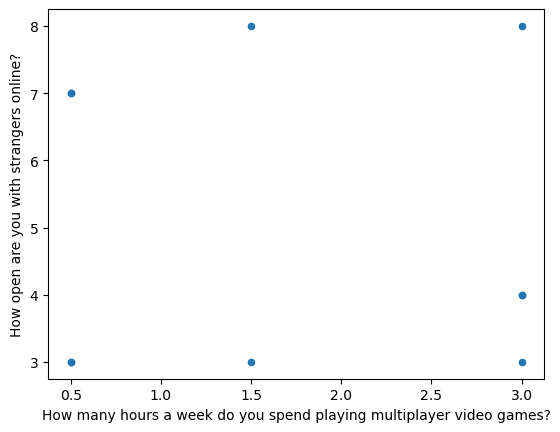

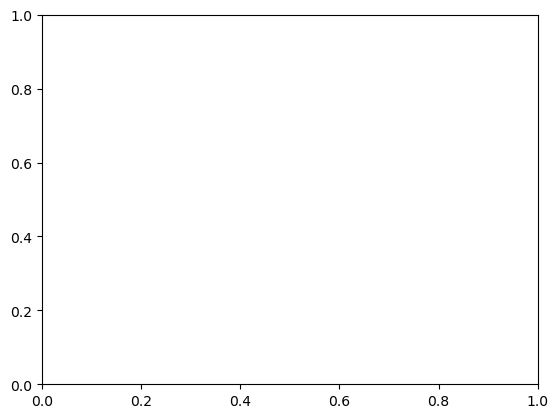

In [31]:
# Anna
df.plot(x='How many hours a week do you spend playing multiplayer video games?', y = 'How open are you with strangers online?', kind='scatter')
plt.show()
ax = plt.axes()


**MULTIPLE LINEAR REGRESSIONS TESTS**

Does time spent playing video games and on social media impact in-person openness with strangers